### Applying Traditional Machine Learning Algorithm 
#### Md. Asifur Rahman Asif


In [158]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
# from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data

In [159]:
df = pd.read_csv("latest_water_potability.csv")

display(df.head(10))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


#### Data Preprocessing

In [160]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [161]:
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [163]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#### Standardization

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()

In [166]:
scaler.fit(df.drop('Potability', axis=1))

StandardScaler()

In [167]:
scaled_features =scaler.transform(df.drop('Potability', axis=1))

In [168]:
scaled_features

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

In [169]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [170]:
df_feat = pd.concat([pd.DataFrame(df_feat), pd.DataFrame(df['Potability'])], axis=1)

In [171]:
df_feat

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,0.728872,1.240155,-0.118075,0.017772,0.601124,1
3272,0.499833,-0.085667,-0.534295,0.593290,-0.014799,-0.417706,1.698560,0.013636,-1.497627,1
3273,1.595654,-0.626829,1.270810,0.144017,-0.014799,0.072263,-0.981329,0.218038,-0.856007,1
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.014799,-0.288597,-0.942064,0.702756,0.950797,1


#### Data Balancing

In [172]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

#### Random Oversampling

In [173]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority',random_state=50)
oversampled_X, oversampled_Y = oversample.fit_resample(df_feat.drop('Potability', axis=1), df_feat['Potability'])
df_feat = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [174]:
df_feat['Potability'].value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

In [175]:
df_feat

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,0,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,0,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786
...,...,...,...,...,...,...,...,...,...,...
3991,1,-0.234725,-0.543757,1.138086,-0.940925,-0.014799,-1.044778,0.157280,-0.144494,1.468053
3992,1,0.237373,0.416025,1.033272,-0.472294,-0.595080,0.429258,0.762177,-1.572823,-0.325665
3993,1,-0.107066,0.440793,0.826881,-0.701690,-2.251820,-0.418770,-0.421072,0.676852,0.809773
3994,1,0.366252,0.885887,-0.821368,0.543527,0.638707,-1.053439,0.214560,-0.666785,-1.316469


#### Train test seperation

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X = df_feat.drop(['Potability'],axis=1)
y = df_feat['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786
...,...,...,...,...,...,...,...,...,...
3991,-0.234725,-0.543757,1.138086,-0.940925,-0.014799,-1.044778,0.157280,-0.144494,1.468053
3992,0.237373,0.416025,1.033272,-0.472294,-0.595080,0.429258,0.762177,-1.572823,-0.325665
3993,-0.107066,0.440793,0.826881,-0.701690,-2.251820,-0.418770,-0.421072,0.676852,0.809773
3994,0.366252,0.885887,-0.821368,0.543527,0.638707,-1.053439,0.214560,-0.666785,-1.316469


In [179]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3991    1
3992    1
3993    1
3994    1
3995    1
Name: Potability, Length: 3996, dtype: int64

#### KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
knn = KNeighborsClassifier()

In [182]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Training Accuracy

In [183]:
pred = knn.predict(X_train)

In [184]:
accuracy = accuracy_score(y_train,pred)
print(accuracy)

0.7678347934918648


#### Cross Validation (K-fold Validation)

In [185]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knn_acc=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(knn,X_train,y_train,cv=5,method='predict_proba')

Validation Accuracy

In [186]:
knn_acc

array([0.6171875 , 0.63067293, 0.59624413, 0.60876369, 0.59937402])

In [187]:
knn_acc.mean()

0.6104484546165885

#### Test Accuracy

In [188]:
pred = knn.predict(X_test)

In [189]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.6525


In [190]:
from sklearn.metrics import classification_report, confusion_matrix

#### Confusion Matrix

In [191]:
confusion_matrix_ = confusion_matrix(y_test, pred)

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[250 144]
 [134 272]]


In [192]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  250
False Negatives =  134
False Positives =  144
True Positives =  272


#### True Positive Rate, Flase Positive Rate

In [193]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.67
False Positive Rate =  0.37


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

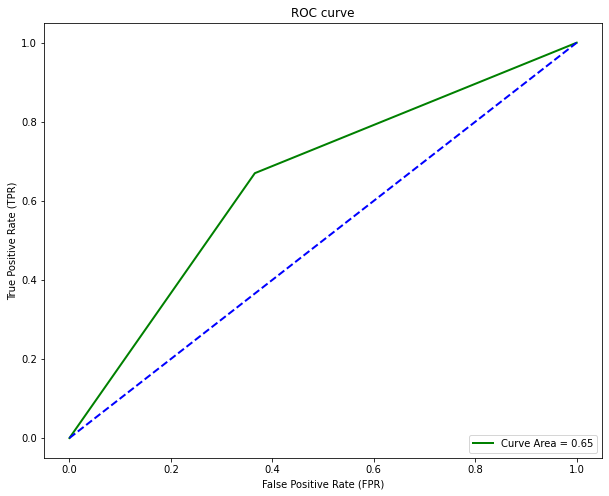

In [194]:
fpr, tpr, thr = roc_curve(y_test, pred)
auc = np.round(roc_auc_score(y_test, pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Determining the best value of K

In [54]:
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    
    confusion_matrix_ = confusion_matrix(y_test, pred)

    TN = confusion_matrix_[0,0]
   
    FN = confusion_matrix_[1,0]

    FP = confusion_matrix_[0,1]

    TP = confusion_matrix_[1,1]

    accuracy = accuracy_score(y_test,pred)
    
    precision = np.round(TP/(TP+FP), 2)
    recall = np.round(TP/(TP+FN), 2)
    f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)
    
    print(i)
    print("Accuracy = ",accuracy)
    print("Precision = ", precision)
    print("Recall = ", recall)
    print("f1 score = ", f1_score_)
    print()

1
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

2
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

3
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

4
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

5
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

6
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

7
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

8
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0

9
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0



#### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=42
knn_params = {   
    "n_neighbors": range(1, 9, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": range(1, 35, 5)
   
}

knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

final_model = knn.set_params(**grid_result.best_params_)
final_model.fit(X_train,y_train)
kpred = final_model.predict(X_test)

print(classification_report(y_test, kpred))
print(confusion_matrix(y_test, kpred))

print(grid_result.best_params_)



KeyboardInterrupt: 

#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

In [ ]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, kpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
bpred = knn.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test, bpred)
print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[3189  111]
 [ 124  685]]


In [31]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3189
False Negatives =  124
False Positives =  111
True Positives =  685


#### Accuracy

In [32]:
accuracy = accuracy_score(y_test,bpred)
print(accuracy)

0.9428084692139207


#### True Positive Rate, False Positive Rate

In [33]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.85
False Positive Rate =  0.03


#### Decision Tree

In [34]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

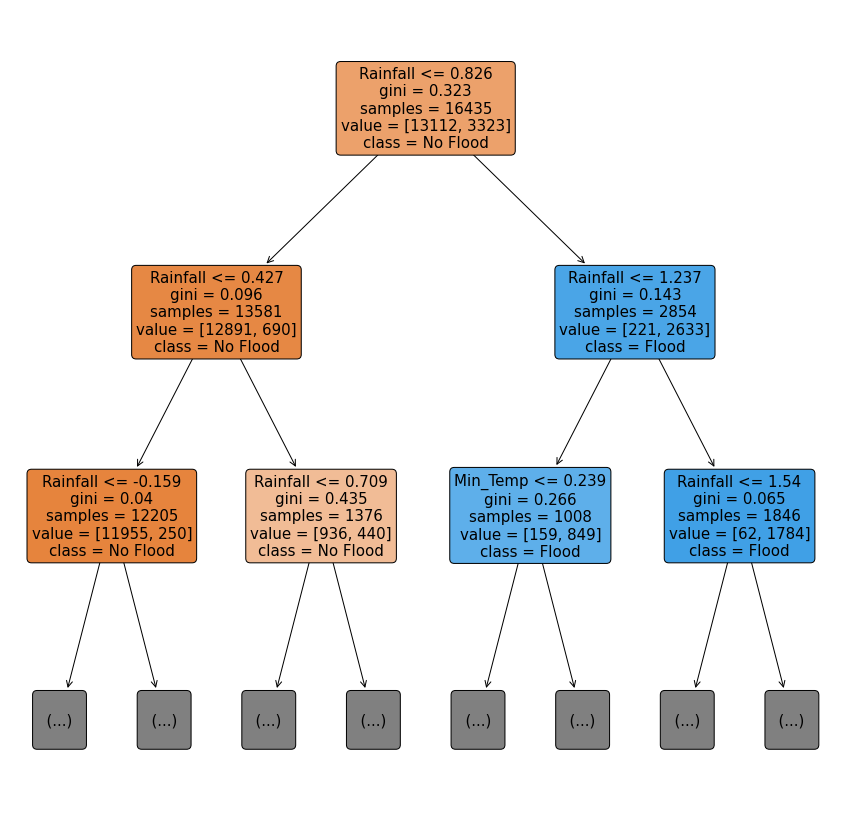

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dtree, filled=True, rounded=True, class_names = ["No Flood", 'Flood'],
         feature_names = X.columns, max_depth=2, fontsize=15)

plt.show()

In [37]:
dpred = dtree.predict(X_test)

#### Confusion Matrix

In [38]:
confusion_matrix_ = confusion_matrix(y_test, dpred)
print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[3082  218]
 [ 142  667]]


In [39]:
DTN = confusion_matrix_[0,0]
print("True Negatives = ", DTN)

DFN = confusion_matrix_[1,0]
print("False Negatives = ", DFN)

DFP = confusion_matrix_[0,1]
print("False Positives = ", DFP)

DTP = confusion_matrix_[1,1]
print("True Positives = ", DTP)

True Negatives =  3082
False Negatives =  142
False Positives =  218
True Positives =  667


#### Accuracy

In [40]:
accuracy = accuracy_score(y_test,dpred)
print(accuracy)

0.9123874422000486


#### True Positive Rate, False Positive Rate

In [41]:
DTPR = np.round(DTP/(DTP+DFN), 2)
DFPR = np.round(DFP/(DFP+DTN), 2)

print("True Positive Rate = ", DTPR)
print("False Positive Rate = ", DFPR)

True Positive Rate =  0.82
False Positive Rate =  0.07


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

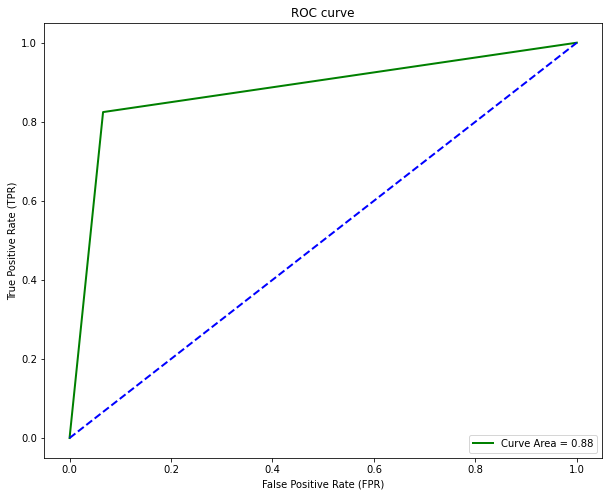

In [42]:
fpr, tpr, thr = roc_curve(y_test, dpred)
auc = np.round(roc_auc_score(y_test, dpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
              'max_features': ['auto'],
              'max_depth': np.arange(3, 8, 1).tolist(),
              'min_samples_leaf': np.arange(1, 3, 2).tolist()}

grid_search = GridSearchCV(estimator=dtree,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)

In [44]:
h_pred = np.round(grid_result.predict(X_test), 2)

In [45]:
grid_result.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [46]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.946760,0.940371,0.945847,0.944022,0.946760,0.944752,0.002408,1
9,entropy,7,0.946152,0.940067,0.945847,0.939763,0.944022,0.943170,0.002758,2
2,gini,5,0.944935,0.938546,0.945239,0.940980,0.945847,0.943109,0.002854,3
0,gini,3,0.945543,0.935199,0.946456,0.940980,0.946760,0.942988,0.004415,4
4,gini,7,0.945847,0.941588,0.943109,0.937633,0.944935,0.942622,0.002896,5
3,gini,6,0.946152,0.936416,0.946456,0.938242,0.944935,0.942440,0.004244,6
6,entropy,4,0.942805,0.930027,0.946760,0.938850,0.945847,0.940858,0.006080,7
7,entropy,5,0.929419,0.942501,0.926985,0.941588,0.948890,0.937876,0.008326,8
5,entropy,3,0.898996,0.937329,0.939458,0.941892,0.946760,0.932887,0.017234,9
1,gini,4,0.920901,0.937633,0.946456,0.940675,0.906906,0.930514,0.014545,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


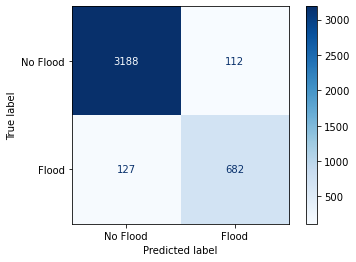

In [47]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["No Flood", "Flood"],
                      cmap='Blues')
plt.show()

In [48]:
confusion_matrix_dt = confusion_matrix(y_test, h_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print(classification_report(y_test, h_pred))

confusion_matrix: 
 [[3188  112]
 [ 127  682]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3300
           1       0.86      0.84      0.85       809

    accuracy                           0.94      4109
   macro avg       0.91      0.90      0.91      4109
weighted avg       0.94      0.94      0.94      4109



In [49]:
accuracy = accuracy_score(y_test,h_pred)
print(accuracy)

0.9418349963494768


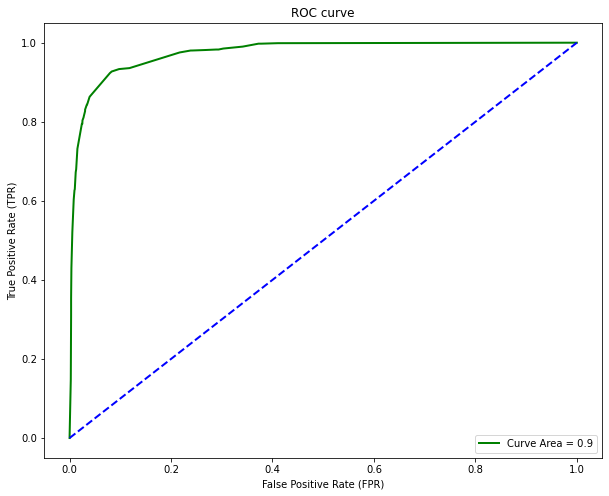

In [50]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, h_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [51]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(n_estimators=200)
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [53]:
rfc_pred = rfc.predict(X_test)

#### Confusion Matrix

In [54]:
confusion_matrix_ = confusion_matrix(y_test, rfc_pred)

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[3192  108]
 [ 133  676]]


In [55]:
RTN = confusion_matrix_[0,0]
print("True Negatives = ", RTN)

RFN = confusion_matrix_[1,0]
print("False Negatives = ", RFN)

RFP = confusion_matrix_[0,1]
print("False Positives = ", RFP)

RTP = confusion_matrix_[1,1]
print("True Positives = ", RTP)

True Negatives =  3192
False Negatives =  133
False Positives =  108
True Positives =  676


#### Accuracy

In [56]:
accuracy = accuracy_score(y_test,rfc_pred)
print(accuracy)

0.9413482599172548


#### True Positive Rate, False Positive Rate

In [57]:
RTPR = np.round(RTP/(RTP+RFN), 2)
RFPR = np.round(RFP/(RFP+RTN), 2)

print("True Positive Rate = ", RTPR)
print("False Positive Rate = ", RFPR)

True Positive Rate =  0.84
False Positive Rate =  0.03


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

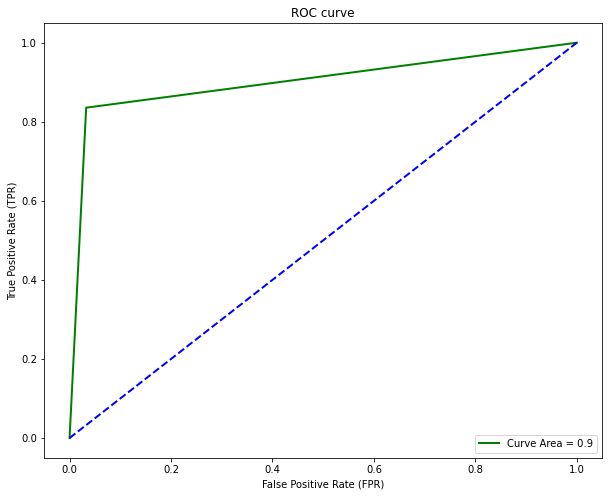

In [58]:
fpr, tpr, thr = roc_curve(y_test, rfc_pred)
auc = np.round(roc_auc_score(y_test, rfc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
